## Student Daniel Burke 12067717

### Task 1: Exploratory Data Analysis (EDA) - Description

*In this notebook, perform EDA of the bank dataset bank.csv by following the notebook Tutorial 1-1 - Exploratory Data Analysis.ipynb as an example.*

-- Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).

Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
Make sure your conclusions are related to the question you have formulated.

*Submit one post to the forum for E-tivity 1 with:*
*a summary of your most interesting discoveries in the bank dataset (max 250 words).*
*description of how you intend to fill-in missing values, encode and scale data, and treat outliers (max 250 words).*
*description of any features you have created or intend to create and why (max 250 words).*
*a link to your code (work in progress - gitlab)*


Goals: Ensure that you have:

Encoded all categorical attributes as numerical,
Filled in all missing values,
Applied a scaler to rescale features,
Treated outliers and skewed attribute distribution appropriately,
Created at least one new feature from the existing ones.
Shortly describe and justify the data preparation choices you have made in markdown cells.

This dataset is an excerpt of the Bank Marketing dataset from the UCI repository. Please refer to the description of the dataset at the UCI repository for understanding the meaning of the columns - I will list this and some background below if necessary to show more detail than the below.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

default:	(Binary)		has credit in default?
balance: 	(Integer)		average yearly balance
housing:	(Binary)		has housing loan?
loan: 	    (Binary)		has personal loan?
pdays:  	(Integer)       number of days that passed by after the client was last contacted from a previous campaign.
previous:	(Integer)       number of contacts performed before this campaign and for this client.

should I explore these or a few others?
Initially I am not sure.

## A. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


df = pd.read_csv('./bank.csv')

df_original = df # make a copy

print("Instances, Features: ", df.shape)

Instances, Features:  (2000, 17)


## B. Quick Data Exploration

In [2]:
df.head(10)

age            job   marital  education default  balance housing loan  \
0  32.0     technician    single   tertiary      no      392     yes   no   
1  39.0     technician  divorced  secondary      no      688     yes  yes   
2  59.0        retired   married  secondary      no     1035     yes  yes   
3  47.0    blue-collar   married  secondary      no      398     yes  yes   
4  54.0        retired   married  secondary      no     1004     yes   no   
5  46.0  self-employed  divorced   tertiary      no      926     yes   no   
6  34.0    blue-collar   married  secondary      no     1924     yes  yes   
7  45.0       services  divorced  secondary      no      396     yes  yes   
8  58.0     management  divorced   tertiary      no      315     yes   no   
9  49.0     management  divorced   tertiary      no    20727      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   
5  cellular    1   apr       463         1    133         3  failure   
6  cellular    1   apr       161         2    253         1  failure   
7  cellular    1   apr       251         4    329         4  failure   
8  cellular    1   apr       121         2    135         2  failure   
9  cellular    1   apr       285         3    132         2  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no  
5         no  
6         no  
7         no  
8         no  
9         no

In [3]:
df.tail(10)

age           job   marital  education default  balance housing loan  \
1990  36.0    technician   married   tertiary      no      376      no   no   
1991  39.0        admin.  divorced  secondary      no      112      no   no   
1992  78.0       retired  divorced    primary      no      527      no   no   
1993  35.0    management   married        NaN      no     2326     yes  yes   
1994  26.0       student    single  secondary      no      655      no   no   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1990   cellular   16   sep       173         1     -1         0      NaN   
1991   cellular   16   sep       574         3     -1         0      NaN   
1992   cellular   16   sep       193         1     -1         0      NaN   
1993   cellular   16   sep       319         1     -1         0      NaN   
1994   cellular   16   sep       190         1     -1         0      NaN   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1990        yes  
1991        yes  
1992        yes  
1993        yes  
1994        yes  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### B.0 Data Process and some initial Encoding

Some of the null and na variables here I speak to and examined and pondered early in the project, and I am coming back to tidy up now. I have left them in this earlier section to make it hopefully easier to read.

I considered dropping some of the seamingly trivial features but decided not to.

In [4]:
df.isnull().sum()
# df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

I need to remove the null values from the age feature, apart from that i should be okay, I can leave the rest to One-Hot encode, at the end of section B.

##### Attempting to pull Nan values in age

First I am going to try a simple approach, and then the more complicated approach, then, if I am struggling and feel that the accuracy is not right due to these mean value assumptions, I will try to pull the ages from the last phonecall, and increase the accuracy even further, although I feel this is not necessary.

In [5]:
# Calculate the mean value as a rough first order approximation
#df['age'].fillna(df['age'].mean(), inplace=True)  ## first attempt

# better approximation version

# replace with the mean age for each job group
mean_age_by_job = df.groupby('job')['age'].transform('mean')

# Fill NaN values in the 'age' column with the corresponding mean age for each job group
df.loc[:, 'age'] = df['age'].fillna(mean_age_by_job)

# print the stats again to see if they have changed
df.isnull().sum()

age             0
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [6]:
FEATURES = list(df.columns.values)
print(FEATURES) # I can see from above it's 7 numerical features and 10 Categoricals.

# this will change below with the encoding.

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']


### B.1. Quick Examination of Numerical Features

In [7]:
'''
Initially appears to be a slice of 2000 rows from the full sample dataset, with some data missing in some columns.
'''

# show all numerical attributes with summary # 7 of them.
df.describe().round(2)

### additional thoughts I have, should I investigate the count of the binary values and the classification columns? # 10 of them.

## Initially I feel like I should investigate the breakdown of average balance by education and by marital status?

# I see balance, but from the example we are short things like

#ApplicantIncome
#CoapplicantIncome 
#LoanAmount 
#Loan_Amount_Term 
#Credit_History

#do these have matching points of interest here? I am not sure.


age   balance      day  duration  campaign    pdays  previous
count  2000.00   2000.00  2000.00   2000.00   2000.00  2000.00   2000.00
mean     41.75   1413.66    13.85    292.02      1.91   167.90      2.56
std      12.70   3131.22     9.71    221.56      1.38   131.75      3.40
min      18.00   -980.00     1.00      7.00      1.00    -1.00      0.00
25%      32.00    201.50     5.00    146.00      1.00    75.75      1.00
50%      38.00    551.00    12.00    236.00      1.00   182.00      2.00
75%      50.00   1644.50    23.00    379.00      2.00   251.00      3.00
max      93.00  81204.00    31.00   1823.00     11.00   854.00     55.00

This whole below section I moved and dealt with above. I have left it in the final submission, as a guide to clarify what my mind workflow was.

I can see that the age column has 12 missing records, the rest of the numerical values are full, 2000. I am going to inspect the 12 records initially, and leave them for now, they are Nan, and I suspect they may be the same person contacted twice - and I may be able to predict this, or figure this out, if I deem its relevant below. This is from the given documents - https://archive.ics.uci.edu/dataset/222/bank+marketing.

"marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."

This means I may be able to reduce these 12 errors, if its a key metric for my results.




For the Numerical Features there are only 12 missing values, and they are for the age. I don't suspect that this is critical, but I am going to pull the age in from a row which has a matching balance. This is because I suspect these people had previous calls, where there ages were correct, something I can see initially, and suspect may be right for all if not all of them, and I can fill in the rest missing with the average age for a corresponding job, this might be a little more accurate too. This might all be overkill.

* Note. I deemed this to be overkill at the end of the project and left the age values as the mean for each job, it didn't skew or change the overall values a noticeable amount, and I then could spend more time on the other issues I was having.

In [8]:
df.sort_values('age').tail(15) # i originally used this to see that the values are NaN.

# if previous bigger than one, than we have previous contact? can I pull the age from there?
# I can see previous will increase with each contact, so maybe I can use that as an index.

# could i concatenate job, marital, education and balance? Is that enough? I think it is, if it's relevant.
# I think I should pull the first balance that matches and pull across the age from there.
## if this ends up being important than I can double check with more concatenation that I am on the right track for each 12 gaps.

# for now I have filled with a calculated groupby mean value above, and it appears to be enough for this stage. 
# I will revisit in an appendix if I have time

age        job   marital  education default  balance housing loan  \
1926  80.0    retired   married  secondary      no     8304      no   no   
1562  80.0    retired   married    primary      no      155      no   no   
1560  80.0    retired  divorced    primary      no      235      no   no   
1903  81.0    retired  divorced    primary      no      949      no   no   
1997  81.0    retired   married    primary      no     1154      no   no   
1372  82.0    retired   married    primary      no      243      no   no   
1552  82.0    retired  divorced    primary      no        0      no   no   
1299  82.0  housemaid  divorced    primary      no     1381      no   no   
1872  84.0    retired   married   tertiary      no     4761      no   no   
1721  84.0    retired  divorced    primary      no      639      no   no   
1033  84.0    retired   married  secondary      no    81204      no   no   
1074  86.0    retired   married    primary      no     5236      no   no   
1352  86.0    retired   married    primary      no     1255      no   no   
1370  93.0    retired   married        NaN      no      775      no   no   
1182  93.0    retired   married        NaN      no      775      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1926  telephone    8   sep       606         3     91        13  success   
1562  telephone   12   mar       290         1     93         2  success   
1560   cellular   31   mar       577         1    223         3    other   
1903   cellular   27   sep       188         2    280         1    other   
1997  telephone   17   sep       231         1     -1         0      NaN   
1372   cellular   26   jul       275         1    180         2  success   
1552  telephone   15   mar       506         2    195         1    other   
1299   cellular   28   jul       844         5    181         4  failure   
1872  telephone    9   sep      1405         1     92         3  failure   
1721  telephone   18   may       353         3     -1         0      NaN   
1033  telephone    1   apr       390         1     94         3  success   
1074  telephone    1   apr       558         2     -1         0      NaN   
1352  telephone   14   jul       247         1    180         3  success   
1370   cellular   22   jul       860         2    177         7  success   
1182   cellular    4   aug       476         2     13         9  success   

     subscribed  
1926        yes  
1562        yes  
1560        yes  
1903        yes  
1997        yes  
1372        yes  
1552        yes  
1299        yes  
1872        yes  
1721        yes  
1033        yes  
1074        yes  
1352        yes  
1370        yes  
1182        yes

In [9]:
## I can also get an idea of a possible skew in the data by comparing the mean to the median.

stats = pd.DataFrame({'Median': df.median(numeric_only=True), 'Mean': df.mean(numeric_only=True).round(2)})
print(stats)

# I can add histogram and more code here to calculate the exact skewedness if I think it's needed. On initial quick look it had no effect
# so I am leaving the ages as they are now.

## not sure anything significant jumps out at me here, shelf this for later, I see some others are plotting df_original vs df_changed.

          Median     Mean
age         38.0    41.75
balance    551.0  1413.66
day         12.0    13.85
duration   236.0   292.02
campaign     1.0     1.91
pdays      182.0   167.90
previous     2.0     2.56


I am going to have a slightly deeper dive into the two numerical features which I feel I am going to have the most problems with, the age and the balance. 

* Note. Filling in the missing ages has been moved and dealt with above already. The balance is okay and below I will place the values into bins, as a whole new feature.

In [10]:
# calculate and print the 5 number summaries
''' # not use this one for now.
quartiles = np.percentile(df['Value'], [25, 50, 75])
data_min, data_max = df['balance'].min(), df['Value'].max()

# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)
'''

def summary(data): # more detailed with deciles.
    '''Seven-number summary, printing the results'''
    return np.percentile(data, [0, 10, 25, 50, 75, 90, 100], method="midpoint")

result = summary(df['balance'])

# Format the values to regular floats without exponential notation
formatted_result = ['{:.0f}'.format(val) for val in result]

print([0, 10, 25, 50, 75, 90, 100])
print(formatted_result)
print([0, 10, 25, 50, 75, 90, 100])
print(summary(df['age']))

[0, 10, 25, 50, 75, 90, 100]
['-980', '4', '201', '551', '1645', '3323', '81204']
[0, 10, 25, 50, 75, 90, 100]
[18. 28. 32. 38. 50. 60. 93.]


I can see from the summaries, from a first glance, because I am printing the first and last deciles, I can roughly estimate that the numbers of outliers here is going to be significant, before I plot the boxplots to see.

In [11]:
## explore correlation matrices, standard pearson
#sns.heatmap(df.corr(method='pearson', numeric_only=True), cmap='coolwarm', linewidth=.5);

In [12]:
## Kendall Tau correlation coefficient
#sns.heatmap(df.corr(method='kendall', numeric_only=True), cmap='coolwarm', linewidth=.5);

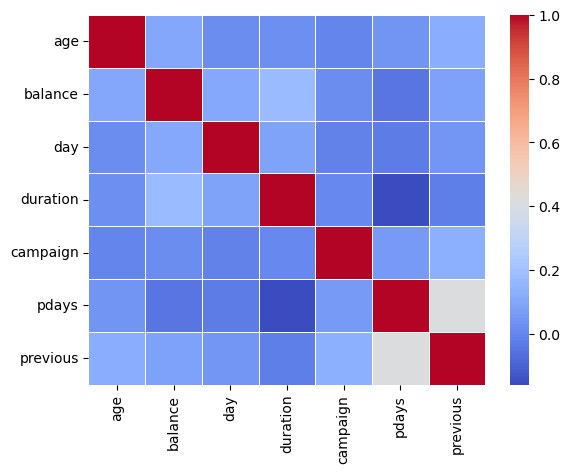

In [13]:
##Spearman rank correlation
sns.heatmap(df.corr(method='spearman', numeric_only=True), cmap='coolwarm', linewidth=.5);
# all similar rank correlations, I am not interested in the individual values for now, the gradient colours show me enough.

/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

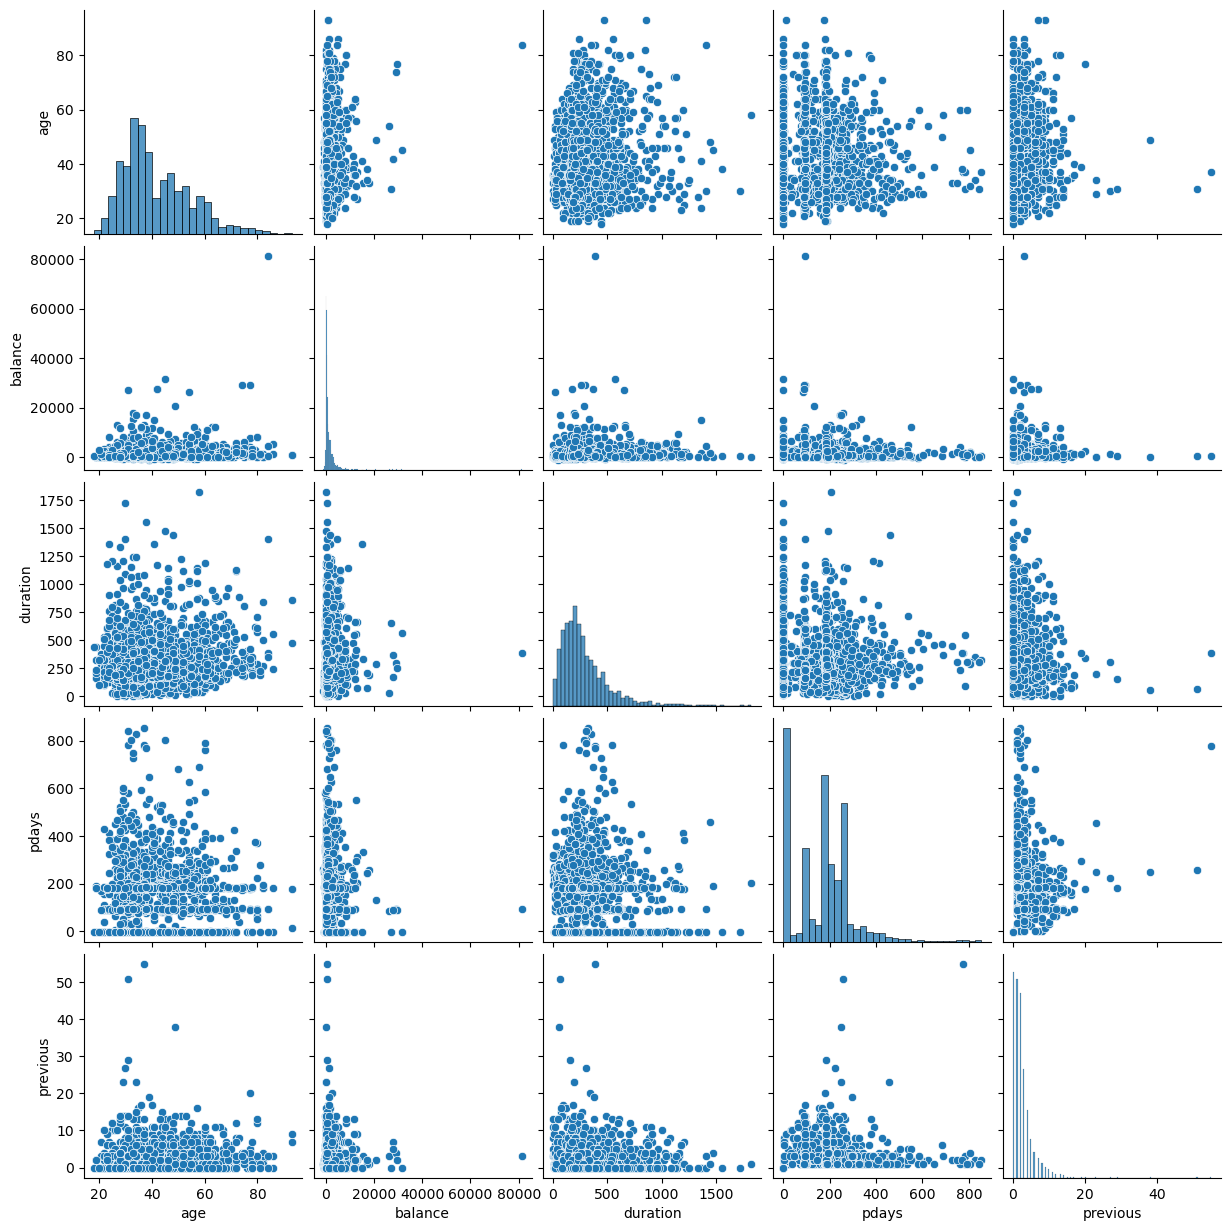

In [14]:
# dropping all rows with missing values - maybe need to correct for this but not sure.
# I need to look at this error again, and the inf values error due to FutureWarning

#sns.pairplot(data=df[['balance','duration','pdays','previous']].dropna()) # do not need to drop the nas now.

sns.pairplot(data=df[['age', 'balance', 'duration', 'pdays', 'previous']]) # possible additions ['day'],['campaign']
# should I look to expand this, or replicate it down below later?

plt.show()

In [15]:
#skewness = df.skew(numeric_only=True)
#kurtosis = df.kurtosis(numeric_only=True)
#pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

What does this show? I ran the correlation with the three different methods, and very similar results in all three, but showing that the tightest and best place to look for correlation is between pdays and previous, age and balance, and balance and duration. The Spearman rank correlation shows a little bit more low values, I am not sure if I should investigate these further yet.

The initial, most interesting thing I can see, is that the last contact duration, 'duration' appears to have some correlation with balance. This initially makes sense to me, as the duration of the phonecall will be longer and there will probably be more calls too when someone is a 'better customer' which may be coming from a higher average balance.

The biggest issue I can now see is the outliers in the balance feature, something I will address below, I suspect I will drop them in order to get a good box and whisker plot.

I want to further examine the pairwise distribution between pdays, previous, duration and balance with a pair plot, although I am not sure I should be doing it all at the same time.

Further down I am considering exploring plotting all of these against the df_original dataset, although I haven't changed that many instances so far.


### B.2. Quick Examination of Categorical Features

I am going to insert some features which I think are important, and some binaries here, and explore them first.

Credit to Mitchell, who explored in his submission combining the married and divorced people to create a binary ever married / never married feature. I am going to attempt replicate his idea here and see how it changes the above plots. In the box plots below, it will be used a few times.

In [16]:
# Insert new binary feature
df['wedded'] = df['marital'].apply(lambda x: x in ['married', 'divorced'])

I want to look for a count or frequency table for the Catagorical Features. I will start with the ones most obvious to me that I suspect have a change of being significant, and leave the others to come back to later.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2000 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
 17  wedded      2000 non-null   bool   
dtypes: bool(1), float64(1), int64(6), object(10)
memory usage: 267.7+ KB

In [18]:
CATEGORICAL_FEATURES = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed', 'wedded']
# was 10 and now it's 11 features.
# CATEGORICAL_FEATURES = df.select_dtypes(include=['object']).columns.tolist()

In [19]:
# Replace missing values with 'unknown'
for col in CATEGORICAL_FEATURES:
    df[col].fillna('unknown', inplace=True) # come back and deal with this futurewarning later.

/var/folders/25/6wb0s2t551x4hj52w7y9l57m0000gn/T/ipykernel_34352/3404139071.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True) # come back and deal with this futurewarning later.


In [20]:
# most of these are trivial binaries.
# Create an empty DataFrame to store the value counts
value_counts_df = pd.DataFrame(columns=['Feature', 'Value', 'Count'])

# Create an empty list
data = []

# Loop through each categorical feature
for feature in CATEGORICAL_FEATURES:
    # Calculate value counts for the current feature
    counts = df[feature].value_counts()
    
    # Loop through each value count
    for value, count in counts.items():
        # Append the feature, value, and count to the list as a dictionary
        data.append({'Feature': feature, 'Value': value, 'Count': count})

# Create a DataFrame from the list of dictionaries
value_counts_df = pd.DataFrame(data)

print(value_counts_df.to_string(index=False))

   Feature         Value  Count
       job    management    461
       job    technician    348
       job   blue-collar    298
       job        admin.    247
       job      services    165
       job       retired    162
       job       student     96
       job    unemployed     69
       job self-employed     64
       job  entrepreneur     45
       job     housemaid     35
       job       unknown     10
   marital       married   1111
   marital        single    674
   marital      divorced    215
 education     secondary    995
 education      tertiary    684
 education       primary    217
 education       unknown    104
   default            no   1985
   default           yes     15
   housing            no   1037
   housing           yes    963
      loan            no   1750
      loan           yes    250
   contact      cellular   1663
   contact       unknown    191
   contact     telephone    146
     month           feb    404
     month           may    333
     mon

I can see the counts here for married, single and divorced. At an earlier draft I created the binary 'wedded' feature, but now I have moved it up to an earlier section above. Another thing that I can see, is the counts for each of the 12 months. I am going to plot these in more detail in a section below.

In [21]:
# Create an empty list  # repeated above process but for sum this time to eyeball for errors
sum_value_counts = []

# Loop through each categorical feature
for feature in CATEGORICAL_FEATURES:
    # Calculate the sum of value counts for the current feature
    feature_sum = df[feature].value_counts().sum()
    
    # Append the sum to the list
    sum_value_counts.append({'Feature': feature, 'Sum': feature_sum})

# Create a DataFrame from the list of dictionaries
sum_value_counts_df = pd.DataFrame(sum_value_counts)

print(sum_value_counts_df.to_string(index=False))

   Feature  Sum
       job 2000
   marital 2000
 education 2000
   default 2000
   housing 2000
      loan 2000
   contact 2000
     month 2000
  poutcome 2000
subscribed 2000
    wedded 2000


For these Categorical features I see a few of them appear to have missing values too, education appears to have the most, but I am not sure how I should deal with this, or if it's relevant. There are 10 values missing from the job feature, and I think I will use something similar to the above, replace this with the value that comes from a matching balance. If any of these are relevant or not, I still haven't made my mind up either. I am not going to drop the null values, as the One-Hot encoding will classify them as numericals for me, I have replaced them with a new string, calling them 'unknown' for now.

I have checked some of the other reports from others in the groups, and gone back over some of this week's notes, and I am going to try One-Hot encoding, and then see how the correlation plots are different.

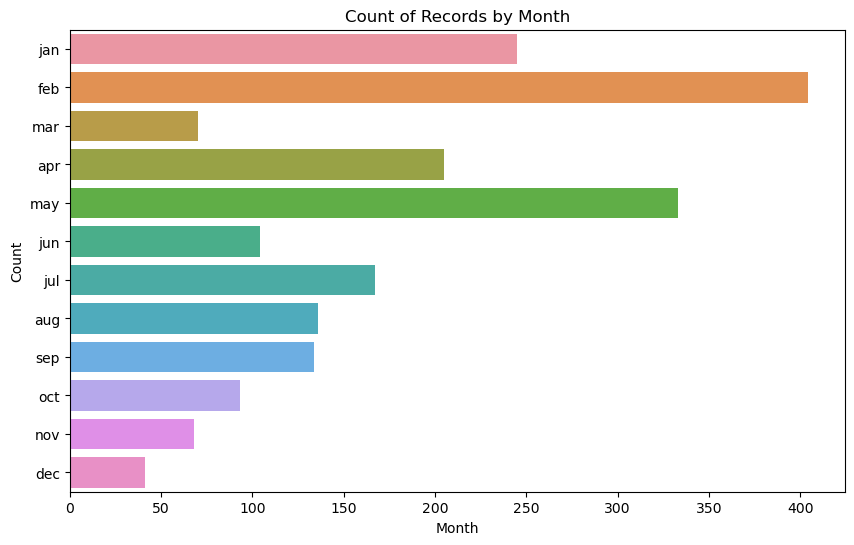

In [22]:
# plot the months and try to figure out how to recognize and encode each month.

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(10, 6))
sns.set_palette("coolwarm")
sns.countplot(data=df, y=df['month'], order=month_order)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Records by Month')
plt.show()

#### Considering One-hot Encoding and it's affects.

https://www.shiksha.com/online-courses/articles/handling-categorical-variables-with-one-hot-encoding/#:~:text=One%2DHot%20encoding%20technique%20is,containing%20either%200%20or%201.

One-Hot encoding technique is used when the features are nominal(do not have any order). In one hot encoding, for every categorical feature, a new variable is created. Categorical features are mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

These newly created binary features are known as Dummy variables. This is also known as Dummy encoding. Now the number of dummy variables depends on the number of categories present.

I am going to attempt this, and then manually inspect the dataframe to see if all appears right.

In [23]:
# one-hot encode all categorical columns

df = pd.get_dummies(df, columns=['job','marital','education','contact','poutcome','wedded',
                                'housing', 'loan', 'default', 'subscribed' ],
                        dummy_na=True, 
                        dtype=int,
                        drop_first=True)

df.sort_values('subscribed_yes').tail(15)
#df = pd.get_dummies(df, drop_first=True)
#df.head(15)

age  balance  day month  duration  campaign  pdays  previous  \
1328  32.0    12569    1   jul       561         2    295         2   
1329  63.0     2896    1   jul       304         1    119         2   
1330  53.0       36    2   jul        25         1    417         1   
1331  43.0     4389    2   jul       632         2     85         1   
1332  39.0      224    2   jul       194         2     88         1   
1333  30.0        0    5   jul       140         1    424         8   
1334  60.0      259    6   jul       396         1    386         2   
1335  48.0      159    7   jul       229         1    251         6   
1336  29.0     1808    7   jul       273         2    433         1   
1337  70.0     2795    8   jul       480         1    181         2   
1338  80.0      668    8   jul       250         1    371         1   
1339  38.0     1767    9   jul       483         4    239         7   
1340  57.0     1044   12   jul       567         1    182         3   
1327  22.0     1232   30   jul       283         1    430         2   
1999  40.0     6403   22   sep       208         2     -1         0   

      job_blue-collar  job_entrepreneur  ...  wedded_True  wedded_nan  \
1328                0                 0  ...            0           0   
1329                0                 0  ...            1           0   
1330                0                 0  ...            1           0   
1331                0                 0  ...            1           0   
1332                0                 0  ...            1           0   
1333                0                 0  ...            0           0   
1334                0                 0  ...            1           0   
1335                0                 0  ...            0           0   
1336                0                 0  ...            0           0   
1337                0                 0  ...            1           0   
1338                0                 0  ...            1           0   
1339                0                 0  ...            1           0   
1340                0                 0  ...            1           0   
1327                0                 0  ...            0           0   
1999                0                 1  ...            1           0   

      housing_yes  housing_nan  loan_yes  loan_nan  default_yes  default_nan  \
1328            0            0         0         0            0            0   
1329            0            0         0         0            0            0   
1330            1            0         1         0            0            0   
1331            0            0         0         0            0            0   
1332            0            0         0         0            0            0   
1333            1            0         0         0            0            0   
1334            0            0         0         0            0            0   
1335            0            0         0         0            0            0   
1336            0            0         0         0            0            0   
1337            0            0         0         0            0            0   
1338            0            0         0         0            0            0   
1339            1            0         0         0            0            0   
1340            0            0         0         0            0            0   
1327            0            0         0         0            0            0   
1999            0            0         0         0            0            0   

      subscribed_yes  subscribed_nan  
1328               1               0  
1329               1               0  
1330               1               0  
1331               1               0  
1332               1               0  
1333               1               0  
1334               1               0  
1335               1               0  
1336               1               0  
1337               1          

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2000 non-null   float64
 1   balance              2000 non-null   int64  
 2   day                  2000 non-null   int64  
 3   month                2000 non-null   object 
 4   duration             2000 non-null   int64  
 5   campaign             2000 non-null   int64  
 6   pdays                2000 non-null   int64  
 7   previous             2000 non-null   int64  
 8   job_blue-collar      2000 non-null   int64  
 9   job_entrepreneur     2000 non-null   int64  
 10  job_housemaid        2000 non-null   int64  
 11  job_management       2000 non-null   int64  
 12  job_retired          2000 non-null   int64  
 13  job_self-employed    2000 non-null   int64  
 14  job_services         2000 non-null   int64  
 15  job_student          2000 non-null   i

In [25]:
df.describe(include='all') # sanity check

age       balance          day month     duration  \
count   2000.000000   2000.000000  2000.000000  2000  2000.000000   
unique          NaN           NaN          NaN    12          NaN   
top             NaN           NaN          NaN   feb          NaN   
freq            NaN           NaN          NaN   404          NaN   
mean      41.748205   1413.663500    13.851500   NaN   292.020500   
std       12.704599   3131.224213     9.712189   NaN   221.557295   
min       18.000000   -980.000000     1.000000   NaN     7.000000   
25%       32.000000    201.500000     5.000000   NaN   146.000000   
50%       38.000000    551.000000    12.000000   NaN   236.000000   
75%       50.000000   1644.500000    23.000000   NaN   379.000000   
max       93.000000  81204.000000    31.000000   NaN  1823.000000   

           campaign        pdays     previous  job_blue-collar  \
count   2000.000000  2000.000000  2000.000000      2000.000000   
unique          NaN          NaN          NaN              NaN   
top             NaN          NaN          NaN              NaN   
freq            NaN          NaN          NaN              NaN   
mean       1.909500   167.896000     2.561500         0.149000   
std        1.378862   131.754126     3.400735         0.356178   
min        1.000000    -1.000000     0.000000         0.000000   
25%        1.000000    75.750000     1.000000         0.000000   
50%        1.000000   182.000000     2.000000         0.000000   
75%        2.000000   251.000000     3.000000         0.000000   
max       11.000000   854.000000    55.000000         1.000000   

        job_entrepreneur  ...  wedded_True  wedded_nan  housing_yes  \
count         2000.00000  ...  2000.000000      2000.0  2000.000000   
unique               NaN  ...          NaN         NaN          NaN   
top                  NaN  ...          NaN         NaN          NaN   
freq                 NaN  ...          NaN         NaN          NaN   
mean             0.02250  ...     0.663000         0.0     0.481500   
std              0.14834  ...     0.472803         0.0     0.499783   
min              0.00000  ...     0.000000         0.0     0.000000   
25%              0.00000  ...     0.000000         0.0     0.000000   
50%              0.00000  ...     1.000000         0.0     0.000000   
75%              0.00000  ...     1.000000         0.0     1.000000   
max              1.00000  ...     1.000000         0.0     1.000000   

        housing_nan     loan_yes  loan_nan  default_yes  default_nan  \
count        2000.0  2000.000000    2000.0  2000.000000       2000.0   
unique          NaN          NaN       NaN          NaN          NaN   
top             NaN          NaN       NaN          NaN          NaN   
freq            NaN          NaN       NaN          NaN          NaN   
mean            0.0     0.125000       0.0     0.007500          0.0   
std             0.0     0.330802       0.0     0.086299          0.0   
min             0.0     0.000000       0.0     0.000000          0.0   
25%             0.0     0.000000       0.0     0.000000          0.0   
50%             0.0     0.000000       0.0     0.000000          0.0   
75%             0.0     0.000000       0.0     0.000000          0.0   
max             0.0     1.000000       0.0     1.000000          0.0   

        subscribed_yes  subscribed_nan  
count      2000.000000          2000.0  
unique             NaN             NaN  
top                NaN             NaN  
freq               NaN             NaN  
mean          0.500000             0.0  
std           0.500125             0.0  
min           0.000000             0.0  
25%           0.000000             0.0  
50%           0.500000             0.0  
75%           1.000000             0.0  
max           1.000000             0.0  

[11 rows x 44 columns]

In [26]:
#df.sort_values('subscribed_yes').head(25)

In [27]:
# checking if the categoricals encoded properly and testing something I suspect, that people who are or have been married are 'more likely'
#  to be subscribed that the others. I think it's close to 50%

pivot_table1 = df.pivot_table(values='balance', 
                        index='wedded_True',
                        columns='subscribed_yes',  
                        aggfunc=np.median)
pivot_table1

/var/folders/25/6wb0s2t551x4hj52w7y9l57m0000gn/T/ipykernel_34352/1083243557.py:4: FutureWarning: The provided callable <function median at 0x1040c1440> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_table1 = df.pivot_table(values='balance',


subscribed_yes      0       1
wedded_True                  
0               365.0   689.0
1               414.0  1058.0

This is now done, to a level which I think is satisfactory, and will allow me to attempt some machine learning techniques down below if I wish. Every column is now numerical, except the month, which I will deal with in the next subsection with a different encoding technique.

#### Cyclical Features Encoding

In [28]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
# Time-related feature engineering taken from the above link in order to deal with the month features properly.
# Basing the month and afterwards day cycle based on sinusoidal cycles.

#encoded_months = [datetime.strptime(month, '%b').month for month in month_order]

# mapping the months manually as I cannot get them to assign numbers from datetime properly.
month_mapping = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

df['month'] = df['month'].map(month_mapping).astype(int) # replace the strings into ints.

# encoding each month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / df['month'].max())
df['month_cos'] = np.cos(2 * np.pi * df['month'] / df['month'].max())


# Encoding each day
df['day_sin'] = np.sin(2 * np.pi * df['day'] / df['day'].max())
df['day_cos'] = np.cos(2 * np.pi * df['day'] / df['day'].max())



This is an important step, due to the cyclical nature of days of the month and months of the year. Smaller values are not lesser values than larger values, and this bias can be seen in so far as December seems closer or as close to November as January does if this is not done correcly.

In [29]:
df.describe(include='all') # sanity check

age       balance          day        month     duration  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.748205   1413.663500    13.851500     5.002500   292.020500   
std      12.704599   3131.224213     9.712189     3.079974   221.557295   
min      18.000000   -980.000000     1.000000     1.000000     7.000000   
25%      32.000000    201.500000     5.000000     2.000000   146.000000   
50%      38.000000    551.000000    12.000000     5.000000   236.000000   
75%      50.000000   1644.500000    23.000000     7.000000   379.000000   
max      93.000000  81204.000000    31.000000    12.000000  1823.000000   

          campaign        pdays     previous  job_blue-collar  \
count  2000.000000  2000.000000  2000.000000      2000.000000   
mean      1.909500   167.896000     2.561500         0.149000   
std       1.378862   131.754126     3.400735         0.356178   
min       1.000000    -1.000000     0.000000         0.000000   
25%       1.000000    75.750000     1.000000         0.000000   
50%       1.000000   182.000000     2.000000         0.000000   
75%       2.000000   251.000000     3.000000         0.000000   
max      11.000000   854.000000    55.000000         1.000000   

       job_entrepreneur  ...     loan_yes  loan_nan  default_yes  default_nan  \
count        2000.00000  ...  2000.000000    2000.0  2000.000000       2000.0   
mean            0.02250  ...     0.125000       0.0     0.007500          0.0   
std             0.14834  ...     0.330802       0.0     0.086299          0.0   
min             0.00000  ...     0.000000       0.0     0.000000          0.0   
25%             0.00000  ...     0.000000       0.0     0.000000          0.0   
50%             0.00000  ...     0.000000       0.0     0.000000          0.0   
75%             0.00000  ...     0.000000       0.0     0.000000          0.0   
max             1.00000  ...     1.000000       0.0     1.000000          0.0   

       subscribed_yes  subscribed_nan    month_sin     month_cos      day_sin  \
count     2000.000000          2000.0  2000.000000  2.000000e+03  2000.000000   
mean         0.500000             0.0     0.218295 -7.347338e-02     0.200956   
std          0.500125             0.0     0.685899  6.906266e-01     0.659767   
min          0.000000             0.0    -1.000000 -1.000000e+00    -0.998717   
25%          0.000000             0.0    -0.500000 -8.660254e-01    -0.394356   
50%          0.500000             0.0     0.500000 -1.836970e-16     0.394356   
75%          1.000000             0.0     0.866025  5.000000e-01     0.848644   
max          1.000000             0.0     1.000000  1.000000e+00     0.998717   

           day_cos  
count  2000.000000  
mean      0.185124  
std       0.700368  
min      -0.994869  
25%      -0.440394  
50%       0.347305  
75%       0.820763  
max       1.000000  

[8 rows x 48 columns]

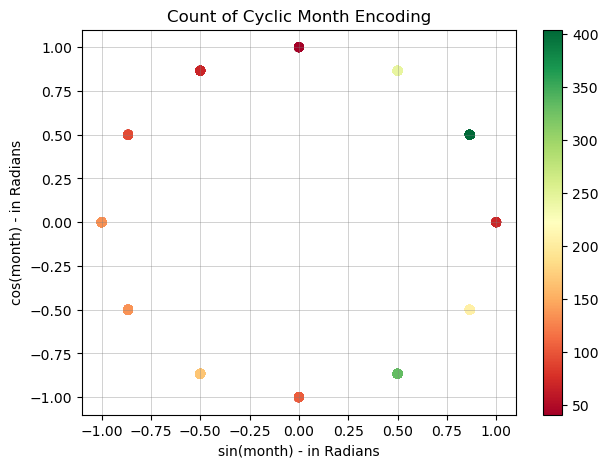

In [30]:
fig, ax = plt.subplots(figsize=(7, 5))

month_counts = df.groupby('month').size()
color_by_count = month_counts[df['month']].values

sp = ax.scatter(df["month_sin"], df["month_cos"], c=color_by_count, cmap='RdYlGn')
ax.set(
    xlabel="sin(month) - in Radians",
    ylabel="cos(month) - in Radians",
)

ax.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5) # for visibility
ax.set_title('Count of Cyclic Month Encoding')

fig.colorbar(sp)
plt.show()

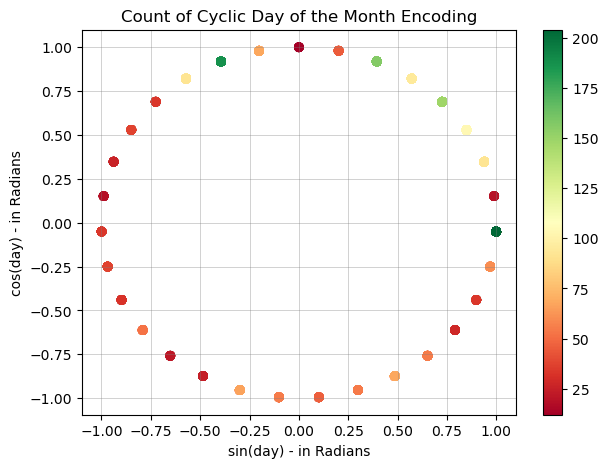

In [31]:
fig, ax = plt.subplots(figsize=(7, 5))

day_counts = df.groupby('day').size()
color_by_count = day_counts[df['day']].values
# this may be incorrect insofaras some days have 28/29/30/31 days, but I am not sure it's relevant.

sp = ax.scatter(df["day_sin"], df["day_cos"], c=color_by_count, cmap='RdYlGn')
ax.set(
    xlabel="sin(day) - in Radians",
    ylabel="cos(day) - in Radians",
)

ax.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5) # for visibility
ax.set_title('Count of Cyclic Day of the Month Encoding')

fig.colorbar(sp)
plt.show()

I have put the plot but haven't quite got the labelling correct. The top of the 'clock' in the cyclical graph is the value 12, corresponding to December, with the next value being 1 clockwise, representing January. From the colours on the colourbar I can see the warm/hotspots where the largest number of months where the last contact took place. These are January/February and April/May. This might be relevant but I doubt that it is, because of the nature of the small sample of data in this case. I think that if it was a more substantial dataset, showing similar trends, I would put it down to people being less likely to answer their phone, or take calls from their bank during the holiday months June/July/August and November/December, or possibly the opposite, that due to pressure in the office due to holiday periods, maybe there were less staff free to make this phonecalls?

I am not sure if I have encovered anything significant here, and so I will park this, as well as the cyclical plots of the day of the month, 
as I suspect it will not show anything significant.

After some consideration I decided to return to this section and plot the cyclical day of the month, even though I think it is Trivial, it does show some small correlation between some clustering of phonecalls at the start and the end of the months. Maybe this is to do with the data sample, maybe it's bias from that, or maybe it's to do with end of month/year/quarter targets, to be honest if the data size was bigger I would go down this road of investigation but I do not think it is going to find anything with strong enough results.

Again, the cyclical graph splits up 2 radians into equal segments (31) around a circle corresponding to the maximum at the top, and the rest of the values rotating clockwise.

In [32]:
# I am not going to drop the old versions of these encoded columns for now, I don't see the need.

# after revisiting some feature correlation below, I now see the need to tidy up and drop these columns.

df.drop(columns=['day', 'month'], inplace=True)
df.head()

age  balance  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392       957         2    131         2                0   
1  39.0      688       233         2    133         1                0   
2  59.0     1035       126         2    239         1                0   
3  47.0      398       274         1    238         2                1   
4  54.0     1004       479         1    307         1                0   

   job_entrepreneur  job_housemaid  job_management  ...  loan_yes  loan_nan  \
0                 0              0               0  ...         0         0   
1                 0              0               0  ...         1         0   
2                 0              0               0  ...         1         0   
3                 0              0               0  ...         1         0   
4                 0              0               0  ...         0         0   

   default_yes  default_nan  subscribed_yes  subscribed_nan  month_sin  \
0            0            0               0               0   0.866025   
1            0            0               0               0   0.866025   
2            0            0               0               0   0.866025   
3            0            0               0               0   0.866025   
4            0            0               0               0   0.866025   

   month_cos   day_sin  day_cos  
0       -0.5  0.201299  0.97953  
1       -0.5  0.201299  0.97953  
2       -0.5  0.201299  0.97953  
3       -0.5  0.201299  0.97953  
4       -0.5  0.201299  0.97953  

[5 rows x 46 columns]

#### Plot the correlation between the newly encoded variables.

In [33]:
df.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2000 non-null   float64
 1   balance              2000 non-null   int64  
 2   duration             2000 non-null   int64  
 3   campaign             2000 non-null   int64  
 4   pdays                2000 non-null   int64  
 5   previous             2000 non-null   int64  
 6   job_blue-collar      2000 non-null   int64  
 7   job_entrepreneur     2000 non-null   int64  
 8   job_housemaid        2000 non-null   int64  
 9   job_management       2000 non-null   int64  
 10  job_retired          2000 non-null   int64  
 11  job_self-employed    2000 non-null   int64  
 12  job_services         2000 non-null   int64  
 13  job_student          2000 non-null   int64  
 14  job_technician       2000 non-null   int64  
 15  job_unemployed       2000 non-null   i

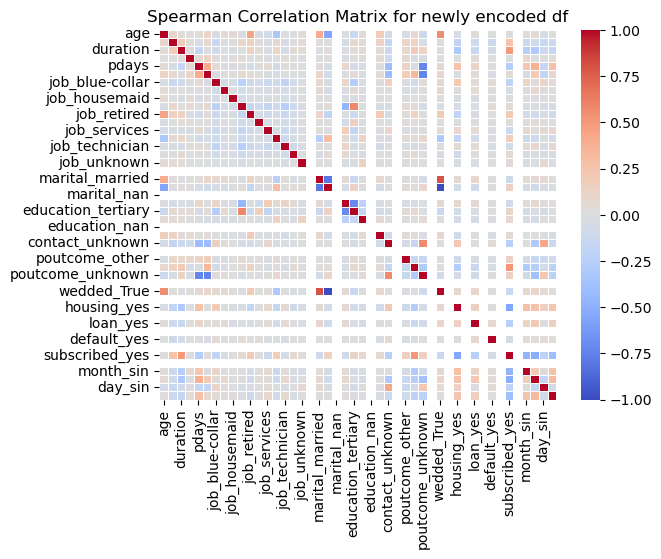

In [34]:
# Calculating the newly encoded correlation matrix

##Spearman rank correlation
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', linewidth=.5) # is spearman best for this, as above?
plt.title('Spearman Correlation Matrix for newly encoded df')
plt.show()

# seems like there are too many features here, I will try another visualization.

I have seen above (and below with some boxplots) that the subscribed is the most interesting correlation to drill down into here. 

From the given documentation, "The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)."

I am going to print the correlation figures first extracted out of the above matrix, and then plot them, ignoring the trivial values for 'subscribed_yes', values for month and day which I think I am going to go back above and drop altogether, and then see. 

My initial thoughts are to explore the interesting correlation between subscribed and poutcome_success, duration, job (retired and student, the two age extremes) and balance, something I explored a little above already. 

Initially it seems the most important correlation here is actually the outcome of the phonecall, showing a little over 51% successful outcome after the phonecall.

In [35]:
# cleanup the clutter and explore the subscribed customers.
print(df.corr()['subscribed_yes'].sort_values(ascending=False))
# is there a quick way to exclude the trivial values from the print function I am not sure.

subscribed_yes         1.000000
poutcome_success       0.510117
duration               0.385209
job_retired            0.201587
job_student            0.182442
balance                0.150395
poutcome_unknown       0.145622
marital_single         0.143859
poutcome_other         0.143703
education_tertiary     0.113833
age                    0.086539
education_unknown      0.076567
job_unemployed         0.073969
contact_telephone      0.069194
previous               0.058678
job_management         0.048676
job_unknown            0.028355
job_housemaid          0.019066
job_self-employed      0.017045
campaign              -0.034457
job_entrepreneur      -0.050572
default_yes           -0.075339
job_technician        -0.079133
education_secondary   -0.093001
marital_married       -0.109678
job_services          -0.118128
pdays                 -0.132887
wedded_True           -0.143859
day_sin               -0.196431
job_blue-collar       -0.202197
contact_unknown       -0.243276
loan_yes

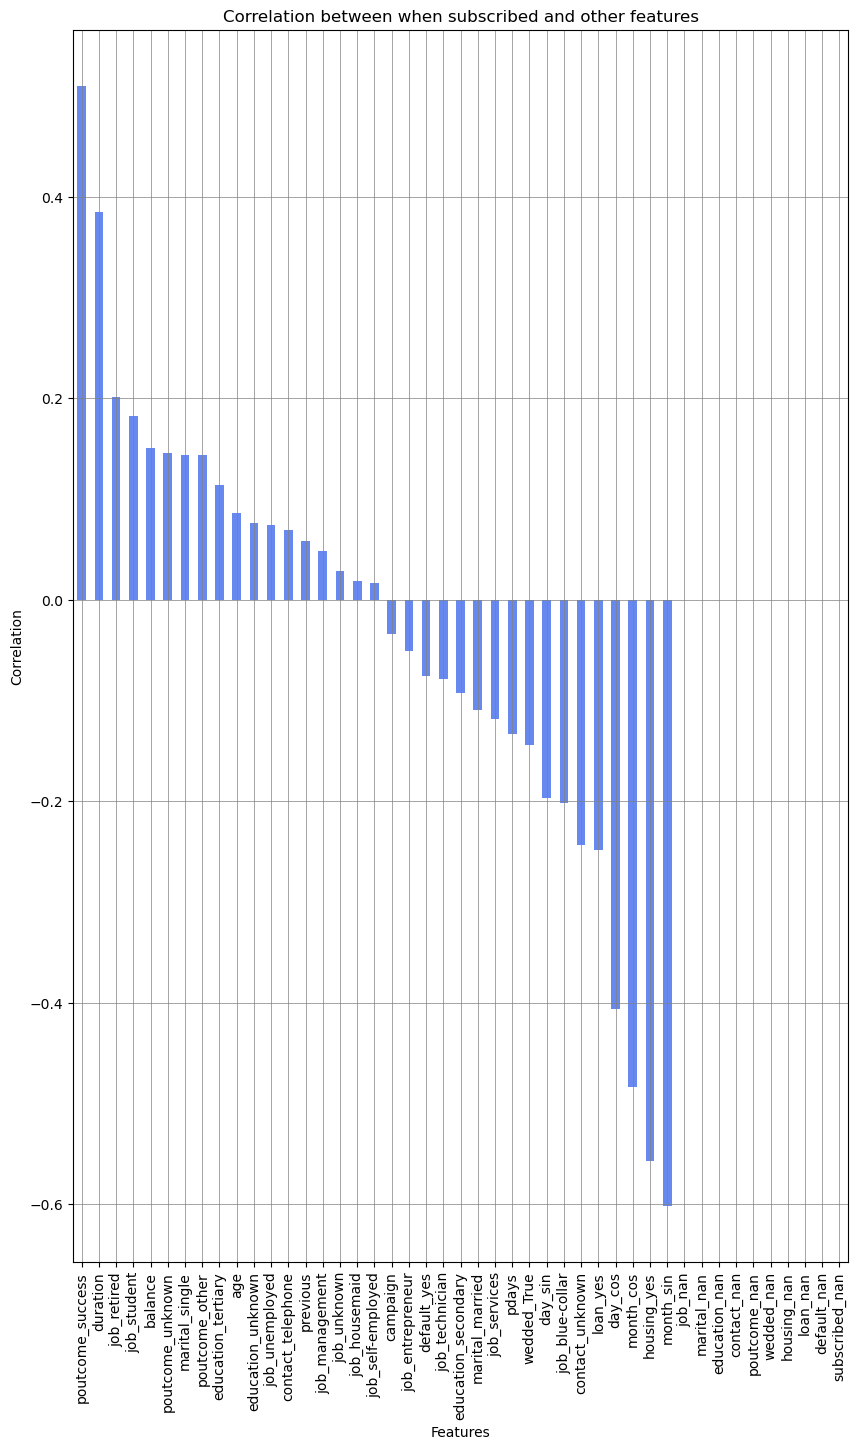

In [36]:
# plot with some of the features dropped to see better.
# I will revisit and drop the month and day above.

plt.figure(figsize=(10, 16)) # large

df.corr()['subscribed_yes'].sort_values(ascending=False).drop('subscribed_yes').plot(kind='bar')

plt.title('Correlation between when subscribed and other features')
plt.ylabel('Correlation')
plt.xlabel('Features')

plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5, color='gray')

plt.show()

I can see here now that the strongest correlation between features at this stage that I can see, are between confirmed subscriptions and the outcome of the phonecall (somewhat trivial outside calculating a KPI for the managers of the bank), the duration of the phonecall (nothing surprising here) and then two jobs (retired and student, which I assume represent the two extremes of the age spectrum) and finally the balance that the customer has in their bank account.

I am not surprised with any of these correlations, but I am going to look further in the next section at visualising in greater detail.

### C. Distribution Analysis for Numerical Features

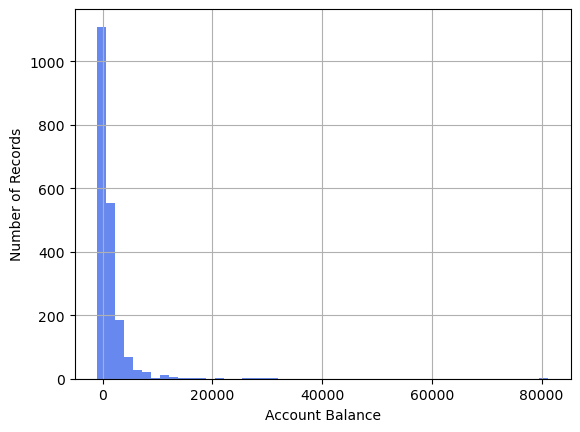

In [37]:
# Histogram Distribution
df_original['balance'].hist(bins=50) # Should I vary this?
plt.xlabel('Account Balance')
plt.ylabel('Number of Records') # of course some clients here are entered multiple times.
plt.show()

# note I see some outliers and extreme values, and a considerable amount of negative values too

The first thing that jumps out at me is the number of people who have low or even negative average yearly balances. I am roughly defining low here as less than 3600 euros, as thats close enough to the median monthly salary here in Ireland in 2024, and would be considered a very small nest egg. Of course many households would have other saving methods, accounts etc but it is still lower than I would have expected. In fact above, the mean, the median and the 75% mark are all well below this 3600 euros mark. It is also interesting how the median is so far below the mean, 862 euros lower, also showing a very negatively skewed tail and alot of extreme values. This negatively skewed tail can be seen in the histogram, and I will look at it in more detail later. I am considering bins based on multiples of 3600.

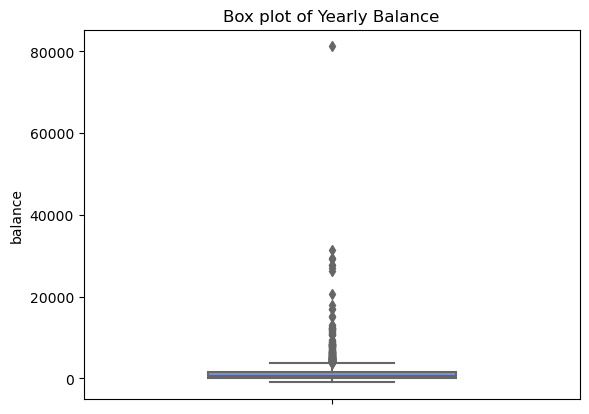

In [38]:
# Boxplot Distribution to check for outliers and extreme values
sns.boxplot(data=df_original, y='balance', width=0.5) # alot of outliers skew the visuals
plt.title('Box plot of Yearly Balance')
plt.show()

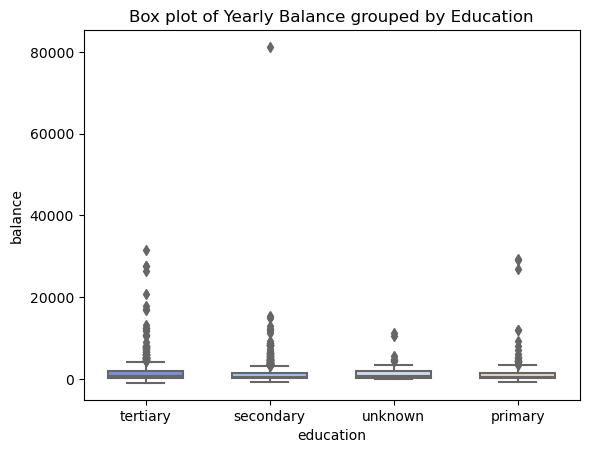

In [39]:
# group by education should show more
sns.boxplot(data=df_original, x='education', y='balance', width=0.6)
plt.title('Box plot of Yearly Balance grouped by Education')
plt.show()

There are still alot of outliers, should I remove everything above 22k so I can see better? That is 6 months median salary nest egg, or maybe half of that, 11k?

There are a number of people with significant average yearly balances from each of these three education levels, although initially I don't actually see too much difference between the actual spread of values.

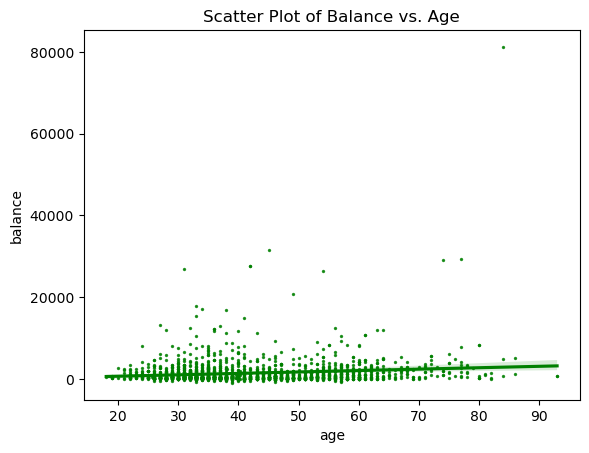

In [40]:
# age v balance scatterplot
#df.plot.scatter(x='age', y='balance')
sns.regplot(data=df, x='age', y='balance', color='green', scatter_kws={'s': 2})
plt.title('Scatter Plot of Balance vs. Age')
plt.show()

#### Examining the two plots from the Correlation Analysis above in greater detail

In [41]:
df_original.info() # need to pull some of these original categoricals before they were encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2000 non-null   float64
 1   job         2000 non-null   object 
 2   marital     2000 non-null   object 
 3   education   2000 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     2000 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    2000 non-null   object 
 16  subscribed  2000 non-null   object 
 17  wedded      2000 non-null   bool   
dtypes: bool(1), float64(1), int64(6), object(10)
memory usage: 267.7+ KB

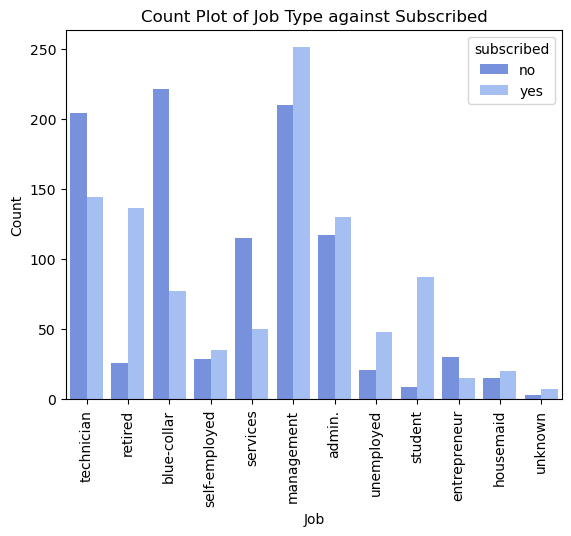

In [42]:
# cannot get violinplot to plot, trying countplot
sns.countplot(data=df_original, x='job', hue='subscribed')

plt.title('Count Plot of Job Type against Subscribed')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

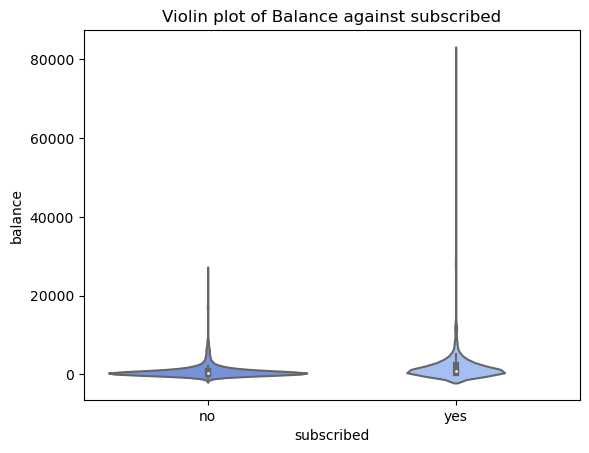

In [43]:
sns.violinplot(data=df_original, x='subscribed', y='balance')
plt.title('Violin plot of Balance against subscribed')
plt.show()

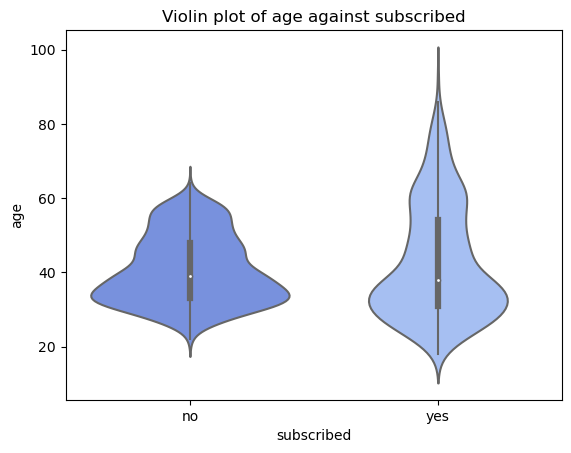

In [44]:
sns.violinplot(data=df_original, x='subscribed', y='age')
plt.title('Violin plot of age against subscribed')
plt.show()

For the job plot, I can see the big absolute value for number of subscribed people is management, which is in line with my initial thoughts in the previous section, lining up with the education breakdown, and it's associated balances. Managers are more likely to have nest eggs, be educated, and be the supposed ideal customer for this bank, ticking alot of the requirements for the algorithm to recommend them for contact, or to approve them for a loan (house or car). On a related and somewhat puzzling note, which I will need to look at in more detail below, is that the big ratio of more yes subscriptions than no subscriptions are the two jobs 'retired' and 'student', which came out in the correlation analysis after the encoding above. I can see this in a little more detail here, maybe this has something to do with a business strategy which the bank is pursuing, or maybe it's a coincidence, or a class thing which I need to do a little more work to uncover. I am still not sure.

For the age versus subscribed plot, I can see there is a fairly nice even distribution here for both the 50% of the records that are subscribed and the 50% of the records that are not subscribed. Those who are subscribed has a larger age range.

For the balance versus subscribed plot, again it is showing me the need to normalise the balances, and to deal with the outliers. I can see the huge count of low balance non subscribers, but I need to deal with the noise before I can make any conclusions.

These all seem like good improvements on the above correlation analysis that I did, but more work is needed.

### D. Box Plot Variations

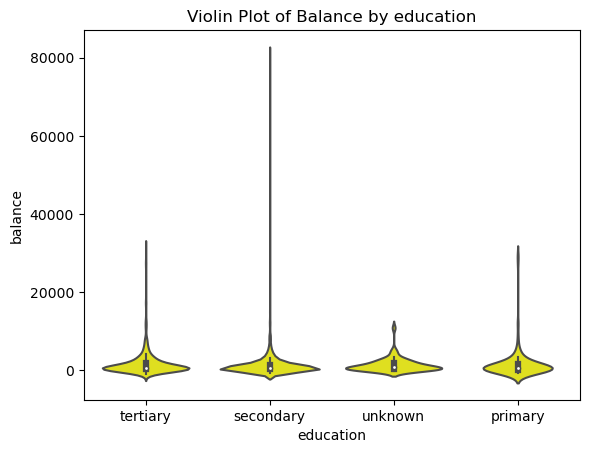

In [45]:
#Violin plot for Average Yearly Balance, grouped by education again
## shows similar to the histplot - not much use for me
sns.violinplot(data=df_original, x='education', y='balance', color='yellow', width=0.8)
plt.title('Violin Plot of Balance by education')
plt.show()

/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/envs/CS5062/lib/python3.11/site-packages/seaborn/categorical.py:3

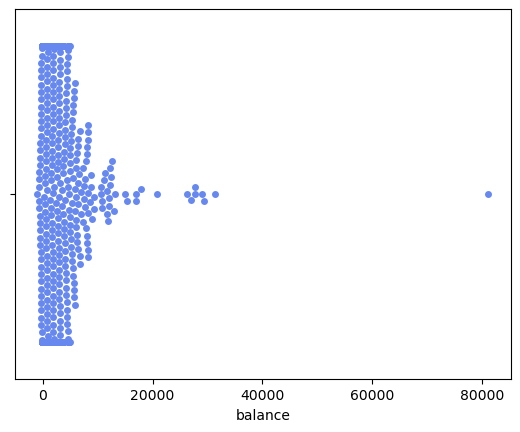

In [46]:
# Swarm plot for Average Yearly Balance
sns.swarmplot(x=df['balance'])
plt.show()

# I have FutureWarning here I need to investigate the inf values and how to deal with them correctly.

I want to split each violin plot by a binary attribute. Or at least to start with one and see what the above results then look like. Poutcome and then subscribed, then see what difference it makes.

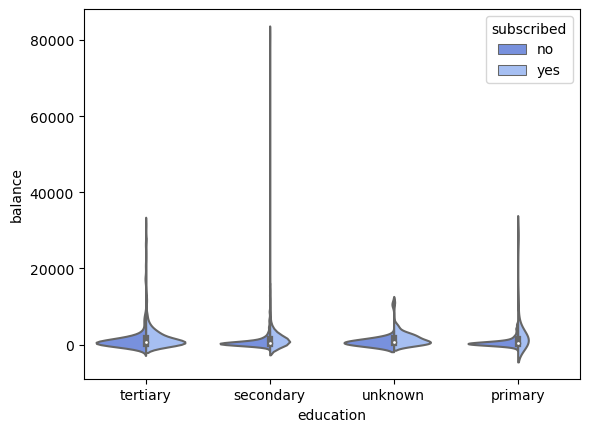

In [47]:
# first draft
# poutcome need to clean

sns.violinplot(data=df_original, x='education', y='balance', hue='subscribed', split=True) # or default?
#plt.title('titletitle')
plt.show()


The outliers here are starting to be an issue, taking some of the scaling to the extreme. I will revisit these violin plots below with them removed, and it should be easier to see the difference between the education levels.

### E. Rescaling Features

##### Rescaling and Normalizing the Balance Feature

In [48]:
df_rescale = df.copy()
df_rescale.describe()

age       balance     duration     campaign        pdays  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.748205   1413.663500   292.020500     1.909500   167.896000   
std      12.704599   3131.224213   221.557295     1.378862   131.754126   
min      18.000000   -980.000000     7.000000     1.000000    -1.000000   
25%      32.000000    201.500000   146.000000     1.000000    75.750000   
50%      38.000000    551.000000   236.000000     1.000000   182.000000   
75%      50.000000   1644.500000   379.000000     2.000000   251.000000   
max      93.000000  81204.000000  1823.000000    11.000000   854.000000   

          previous  job_blue-collar  job_entrepreneur  job_housemaid  \
count  2000.000000      2000.000000        2000.00000    2000.000000   
mean      2.561500         0.149000           0.02250       0.017500   
std       3.400735         0.356178           0.14834       0.131158   
min       0.000000         0.000000           0.00000       0.000000   
25%       1.000000         0.000000           0.00000       0.000000   
50%       2.000000         0.000000           0.00000       0.000000   
75%       3.000000         0.000000           0.00000       0.000000   
max      55.000000         1.000000           1.00000       1.000000   

       job_management  ...     loan_yes  loan_nan  default_yes  default_nan  \
count     2000.000000  ...  2000.000000    2000.0  2000.000000       2000.0   
mean         0.230500  ...     0.125000       0.0     0.007500          0.0   
std          0.421258  ...     0.330802       0.0     0.086299          0.0   
min          0.000000  ...     0.000000       0.0     0.000000          0.0   
25%          0.000000  ...     0.000000       0.0     0.000000          0.0   
50%          0.000000  ...     0.000000       0.0     0.000000          0.0   
75%          0.000000  ...     0.000000       0.0     0.000000          0.0   
max          1.000000  ...     1.000000       0.0     1.000000          0.0   

       subscribed_yes  subscribed_nan    month_sin     month_cos      day_sin  \
count     2000.000000          2000.0  2000.000000  2.000000e+03  2000.000000   
mean         0.500000             0.0     0.218295 -7.347338e-02     0.200956   
std          0.500125             0.0     0.685899  6.906266e-01     0.659767   
min          0.000000             0.0    -1.000000 -1.000000e+00    -0.998717   
25%          0.000000             0.0    -0.500000 -8.660254e-01    -0.394356   
50%          0.500000             0.0     0.500000 -1.836970e-16     0.394356   
75%          1.000000             0.0     0.866025  5.000000e-01     0.848644   
max          1.000000             0.0     1.000000  1.000000e+00     0.998717   

           day_cos  
count  2000.000000  
mean      0.185124  
std       0.700368  
min      -0.994869  
25%      -0.440394  
50%       0.347305  
75%       0.820763  
max       1.000000  

[8 rows x 46 columns]

In [49]:
# scaler = StandardScaler() # first attempt
robust_scaler = RobustScaler()

df_rescale['balance'] = robust_scaler.fit_transform(df_rescale[['balance']])


# I am going to do these separately in case things go wrong, and I don't have too many plots to do a sanity check
other_columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous']
df_rescale[other_columns_to_scale] = robust_scaler.fit_transform(df_rescale[other_columns_to_scale])

df_rescale.describe()

age      balance     duration     campaign        pdays  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.208234     0.597826     0.240431     0.909500    -0.080479   
std       0.705811     2.169941     0.950890     1.378862     0.751807   
min      -1.111111    -1.060984    -0.982833     0.000000    -1.044223   
25%      -0.333333    -0.242204    -0.386266     0.000000    -0.606277   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.666667     0.757796     0.613734     1.000000     0.393723   
max       3.055556    55.892585     6.811159    10.000000     3.834522   

          previous  job_blue-collar  job_entrepreneur  job_housemaid  \
count  2000.000000      2000.000000        2000.00000    2000.000000   
mean      0.280750         0.149000           0.02250       0.017500   
std       1.700368         0.356178           0.14834       0.131158   
min      -1.000000         0.000000           0.00000       0.000000   
25%      -0.500000         0.000000           0.00000       0.000000   
50%       0.000000         0.000000           0.00000       0.000000   
75%       0.500000         0.000000           0.00000       0.000000   
max      26.500000         1.000000           1.00000       1.000000   

       job_management  ...     loan_yes  loan_nan  default_yes  default_nan  \
count     2000.000000  ...  2000.000000    2000.0  2000.000000       2000.0   
mean         0.230500  ...     0.125000       0.0     0.007500          0.0   
std          0.421258  ...     0.330802       0.0     0.086299          0.0   
min          0.000000  ...     0.000000       0.0     0.000000          0.0   
25%          0.000000  ...     0.000000       0.0     0.000000          0.0   
50%          0.000000  ...     0.000000       0.0     0.000000          0.0   
75%          0.000000  ...     0.000000       0.0     0.000000          0.0   
max          1.000000  ...     1.000000       0.0     1.000000          0.0   

       subscribed_yes  subscribed_nan    month_sin     month_cos      day_sin  \
count     2000.000000          2000.0  2000.000000  2.000000e+03  2000.000000   
mean         0.500000             0.0     0.218295 -7.347338e-02     0.200956   
std          0.500125             0.0     0.685899  6.906266e-01     0.659767   
min          0.000000             0.0    -1.000000 -1.000000e+00    -0.998717   
25%          0.000000             0.0    -0.500000 -8.660254e-01    -0.394356   
50%          0.500000             0.0     0.500000 -1.836970e-16     0.394356   
75%          1.000000             0.0     0.866025  5.000000e-01     0.848644   
max          1.000000             0.0     1.000000  1.000000e+00     0.998717   

           day_cos  
count  2000.000000  
mean      0.185124  
std       0.700368  
min      -0.994869  
25%      -0.440394  
50%       0.347305  
75%       0.820763  
max       1.000000  

[8 rows x 46 columns]

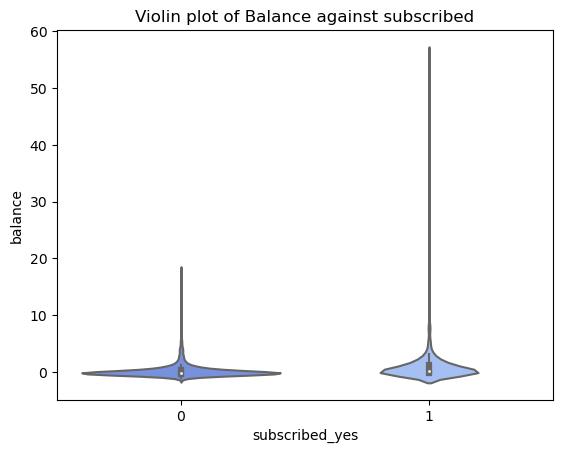

In [58]:
sns.violinplot(data=df_rescale, x='subscribed_yes', y='balance')
plt.title('Violin plot of Balance against subscribed')
plt.show()

Many ML algorithms assume that all numerical features are on the same scale. I am going to use StandardScaler, which rescales a numerical column so that it has mean 0 and standard deviation 1. I have never done this before so I am being cautious in case I am no longer able to visualise my plots properly. I see that the number of outliers may be a problem so I am using the Robust Scaler on the second pass. The Robust Scalar transforms each value by subtracting the median from it, and then deviding by the IQ range. I think this is the best option for me.
 
I can straight away see an improvement, but I need to treat the outliers before I am able to make any concrete deductions from any of the balance plots.

In [79]:
# should I split the balance into bins when I rescale? I don't see the need at this point, until I do some data wrangling.

### F. Treatment of outliers

##### Revisit some of the graphs with the outliers dropped, and attempting a Transformation

The outliers which I can see are the most appropriate right now for me to remove, or at least deal with in the best way I can, are the outliers in the balances. They are throwing off almost all of the plots which I did in the above sections, and I want to revisit them below with the outliers removed to see if I can see better justification for my original estimations and thoughts. I feel this column is the only one which I could describe as spurious/noisy, so I will make an attempt at excluding the data.

I first considered dropping the the outliers outside the range 1.5QR.
 
On further reflection, is just dropping the outliers the correct thing to do? I am aware I am losing alot of data which may be useful, moreso as the dataset has a low enough number of instances in the first place, just 2000. I am also going to consider a log transformation, similar to the examples given in the tutorial. 

In [69]:
# I am going to run off the copy of the dataframe for now, due to potential clashes with the encoding work completed
df_original.describe()

age       balance          day     duration     campaign  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.748205   1413.663500    13.851500   292.020500     1.909500   
std      12.704599   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

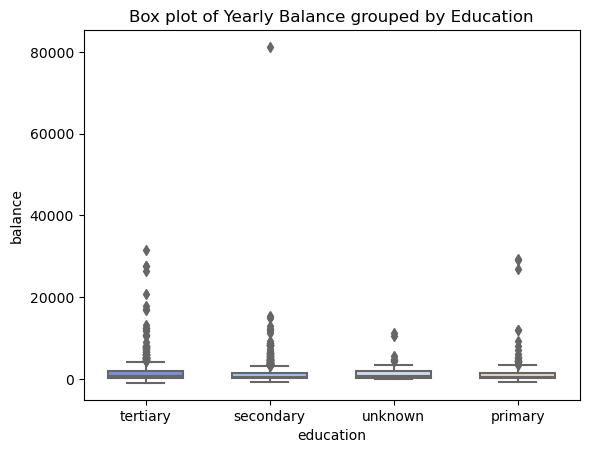

In [60]:
# The first balance related plot I struggled with above
sns.boxplot(data=df_original, x='education', y='balance', width=0.6)
plt.title('Box plot of Yearly Balance grouped by Education')
plt.show()

# Now I want to dump the balance outliers and rerun

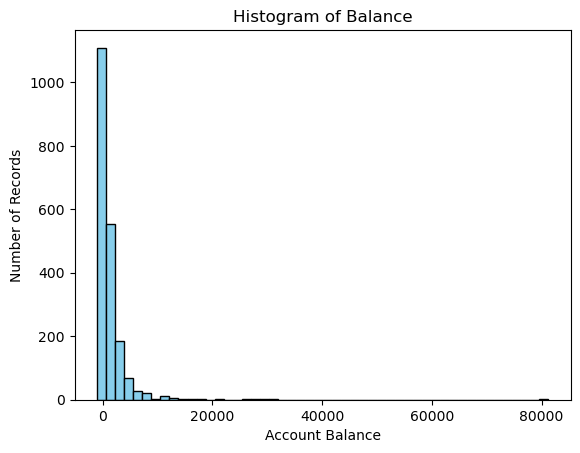

In [67]:
# Histogram Distribution of balances before removal of outliers (as above)

plt.hist(df_original['balance'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Account Balance')
plt.ylabel('Number of Records')
plt.title("Histogram of Balance")
plt.show()

In [68]:
skewness = df_original.skew(numeric_only=True)
kurtosis = df_original.kurtosis(numeric_only=True)
pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

Skewness    Kurtosis
age        0.856808    0.402041
balance   11.461564  231.856074
day        0.403661   -1.285034
duration   2.045787    6.297587
campaign   2.320856    7.162811
pdays      0.920006    2.710735
previous   5.461168   59.746704
wedded    -0.690195   -1.525157

This is really only a quick sanity check on the skewedness of the data for the balance. It is very obvious the vast majority of the balances are close to zero, as I mentioned above, representing people living paycheck to paycheck, if they are like the average person who only has one current account and no savings accounts. This can now be seen numerically, with a much larger than 0 value for the balance Skewness. The Kurtosis can also be seen to be much much greater than 0, showing numerically what can be seen in the histogram, the high probability of extreme values.

In [70]:
# Use a log transformation to decrease the impact of outliers
df_original['balance'] = np.log(df_original['balance'] + abs(min(df_original['balance'])) + 1)

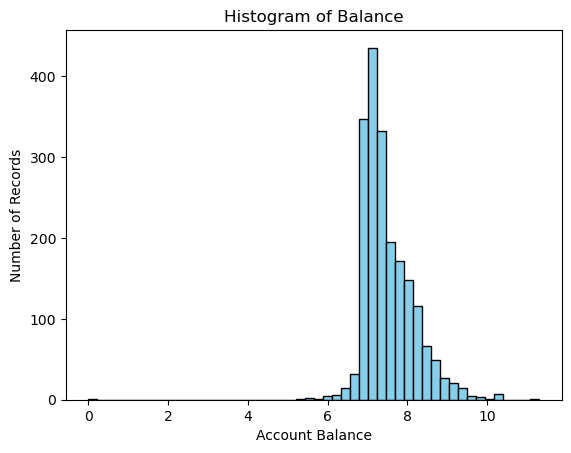

In [71]:
plt.hist(df_original['balance'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Account Balance')
plt.ylabel('Number of Records')
plt.title("Histogram of Balance")
plt.show()

In [78]:
skewness = df_original.skew(numeric_only=True)
kurtosis = df_original.kurtosis(numeric_only=True)
pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

Skewness   Kurtosis
age       0.856808   0.402041
balance   0.312404  10.534466
day       0.403661  -1.285034
duration  2.045787   6.297587
campaign  2.320856   7.162811
pdays     0.920006   2.710735
previous  5.461168  59.746704
wedded   -0.690195  -1.525157

This histogram shows that the transformed features are less skewed and have distributions closer to normal than the original features did. A quick rerun of the skew and kurtosis numbers also show now both numbers are much lower than they were before the transformation.

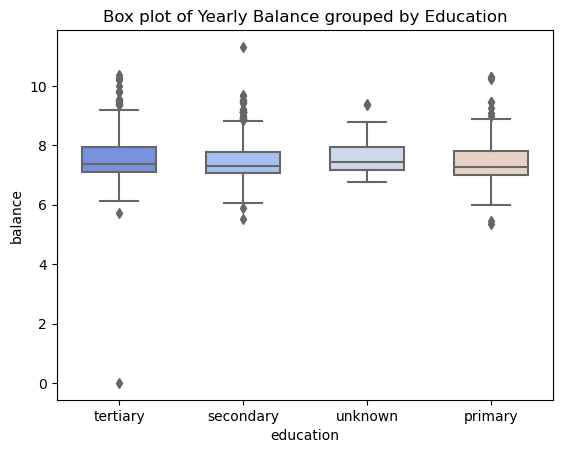

In [72]:
sns.boxplot(data=df_original, x='education', y='balance', width=0.6)
plt.title('Box plot of Yearly Balance grouped by Education')
plt.show()

This removal of outliers was completed for the balances independently of the above rescaling. If I combine them both below I will be able to see the boxplots in greater detail, but I will have lost the original balances which were given and on display and my breakdown of multiples of months of nest egg will be lost. I am not going to have enough time to dive into this in the level of detail which I initially wanted to, which included adding these as their own features, related to the balance, but more normalised, which might plot better against education, job status and age.

In [73]:
# Use a log transformation to decrease the impact of outliers
df_rescale['balance'] = np.log(df_rescale['balance'] + abs(min(df_rescale['balance'])) + 1)

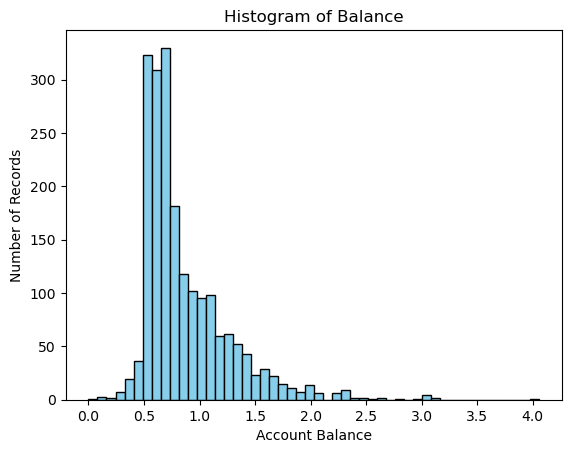

In [75]:
plt.hist(df_rescale['balance'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Account Balance')
plt.ylabel('Number of Records')
plt.title("Histogram of Balance")
plt.show()

I am chosing to leave the ages and the other numerical values with their outliers as they are, as despite my limited knowledge of the business intelligence side of things, my assumptions and general takes from this initial analysis is that they are in a form which is acceptable without further transformations, and that issues such as outliers are not having as damaging an impact as they may seem initially.

I have noticed that some other students in my group are doing some machine learning with support vectors, so if I have time to do something similar here, I may need to do some further work on these columns, which I have chosen to not change here.

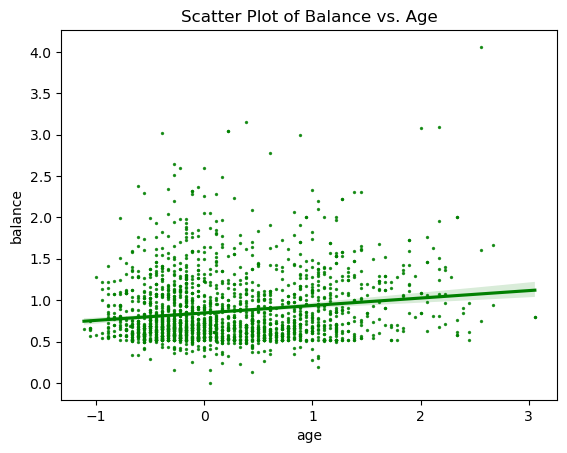

In [77]:
# revisit after rescale and removal of outliers
#df.plot.scatter(x='age', y='balance')
sns.regplot(data=df_rescale, x='age', y='balance', color='green', scatter_kws={'s': 2})
plt.title('Scatter Plot of Balance vs. Age')
plt.show()

That being said, even though I have not removed the outliers for the ages, I have rescaled them now, so I can plot the new balance versus the new age. This plot is much less skewed than the last time I ran it above, but apart from that it doesn't necessarily tell me an awful lot about the spread of balance and ages outside of an initial guess which I could have ran before I even looked at the data - the older a person is, in general, the more money they will have in their bank balance.

#### Reflection after Task One

For the Numerical Features there are only 12 missing values, and they are for the age. I don't suspect that this is critical, but I am going to pull the age in from a row which has a matching balance. This is because I suspect these people had previous calls, where there ages were correct, something I can see initially, and suspect may be right for all if not all of them, and I can fill in the rest missing with the average age for a corresponding job, this might be a little more accurate too. This might all be overkill.

For these Categorical features I see a few of them appear to have missing values too, education appears to have the most, but I am not sure how I should deal with this, or if it's relevant. There are 10 values missing from the job feature, and I think I will use something similar to the above, replace this with the value that comes from a matching balance. If any of these are relevant or not, I still haven't made my mind up either.

The first thing that jumps out at me is the number of people who have low or even negative average yearly balances. I am roughly defining low here as less than 3600 euros, as thats close enough to the median monthly salary here in Ireland in 2024, and would be considered a very small nest egg. Of course many households would have other saving methods, accounts etc but it is still lower than I would have expected. In fact above, the mean, the median and the 75% mark are all well below this 3600 euros mark. It is also interesting how the median is so far below the mean, 862 euros lower, also showing a very negatively skewed tail and alot of extreme values. This negatively skewed tail can be seen in the histogram, and I will look at it in more detail later.

After Boxplots:
There are still alot of outliers, should I remove everything above 22k so I can see better? That is 6 months median salary nest egg, or maybe half of that, 11k?

There are a number of people with significant average yearly balances from each of these three education levels, although initially I don't actually see too much difference between the actual spread of values.

After Violinplots:
I want to split each violin plot by a binary attribute. Or at least to start with one and see what the above results then look like. Poutcome and then subscribed, then see what difference it makes.

I cannot see any features to create straight away, apart from something that might help grouping clarifications, maybe grouping the balances into # of months approx nest egg? For all the work that I have done above on splitting it up by education, I will repeat for the various marital status - maybe then again adding in the number of months nest egg bin.

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no") - this is what is laid out in the literature, I will begin to look at this now and see the scope of what is required.

### Reflection After Task Two

After spending a considerable amount of time on Encoding, transformations, looking at the cyclical features of the day of month and month of year, I think I was able to answer a number of issues I was having with the data set and initial EDA, but not all of them. After normalising and removing outliers, I had a better spread of data, less skewed, but it makes the graphs very difficult to interpret, and reflect some real world meanings onto the numbers.


My intention is to revisit a number of aspects of this dataset after I get the Etivity submitted, and I get my grade and see where I made mistakes. I would like to put in a few more violinplots, if I can confirm I did my encoding correctly, and then after seeing what some of the other students in the group have completed, do some more plots involving age of customers, and putting some of these ages into bins for more plots.

I would also like to download the wider dataset and see if some of my initial thoughts were correct on more data, and to complete some ML techniques as some other students completed with Support Vector Machines.

 ### G. Save and Export the Prepared Dataset

 ##### This will be handy, as well as some of the other derived dataframes here, if there is further Machine Learning to be done.

In [ ]:
df.to_csv('loans_train_prepared.csv')

# insert other functions here to export the report, the table summaries, or some of the plots to the appropiate file type.